In [1]:
pip install requests

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests as rq
from bs4 import BeautifulSoup

In [3]:
req = rq.get("https://covid19.ncdc.gov.ng/")
soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))
ncdc_data=pd.DataFrame(df[0])

In [4]:
ncdc_data.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [5]:
ncdc_data.describe()

nd = ncdc_data.rename(columns = {'No. of Cases (Lab Confirmed)': 'Confirmed cases', 'No. of Cases (on admission)': 'On admission','No. Discharged':'Discharged','No. of Deaths':'Death' }, inplace = False)

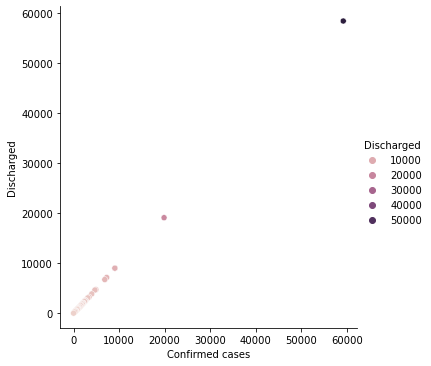

In [6]:
sns.relplot(x="Confirmed cases" , y="Discharged" ,hue="Discharged", data=nd)

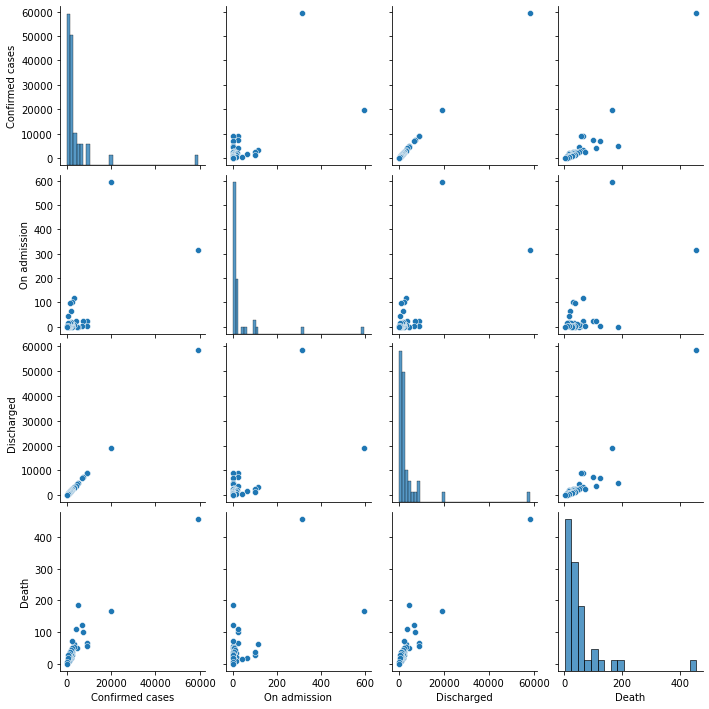

In [7]:
sns.pairplot(nd)

In [8]:
nd.describe()

,Confirmed cases,On admission,Discharged,Death
count,37.000000,37.000000,37.000000,37.000000
mean,4511.297297,41.675676,4412.405405,57.216216
std,9944.020517,109.703148,9799.677385,79.412823
min,5.000000,0.000000,3.000000,2.000000
25%,935.000000,1.000000,913.000000,18.000000
50%,1923.000000,5.000000,1886.000000,32.000000
75%,3409.000000,23.000000,3229.000000,57.000000
max,59213.000000,596.000000,58441.000000,456.000000
